In [2]:
import numpy as np
import pandas as pd
from mat4py import loadmat
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.utils import resample
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"  # or if you want more than 1 GPU set it as "0", "1"
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint
import sklearn
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization,Concatenate,concatenate, Input
from tensorflow.keras.layers import Conv2D, Conv1D, MaxPooling1D
#from tensorflow.keras.utils import np_utils
#from tensorflow.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import pickle
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import LSTM
import torch 

In [57]:
list_string=['ucddb002','ucddb003','ucddb019','ucddb020','ucddb021','ucddb022','ucddb023','ucddb024',
             ]#\'ucddb008'\,'ucddb011','ucddb013','ucddb014','ucddb010','ucddb012','ucddb014','ucddb015','ucddb017',\,\'ucddb025','ucddb026','ucddb027','ucddb028','ucddb005','ucddb006','ucddb007','ucddb009'


valid_features=np.zeros((1,1408))
test_features=np.zeros((1,1408))
valid_labels=np.zeros((1,1))
test_labels=np.zeros((1,1))
for l in list_string:
        
        #displaying data in a good way
        ecg_valid = loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\'+l+'_ecg_valid.mat') 
        ecg_valid = np.array(ecg_valid['ecg_valid'])
        ecg_valid_labels=loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\'+l+'_valid_labels.mat')
        ecg_valid_labels = np.array(ecg_valid_labels['class_valid'])
        valid_features=np.append(valid_features,ecg_valid,axis=0)
        valid_labels=np.append(valid_labels,ecg_valid_labels)
       
        
        ecg_test = loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\'+l+'_ecg_test.mat')
        ecg_test = np.array(ecg_test['ecg_test'])
        ecg_test_labels=loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\'+l+'_test_labels.mat')
        ecg_test_labels = np.array(ecg_test_labels['class_test'])
        test_features=np.append(test_features,ecg_test,axis=0)
        test_labels=np.append(test_labels,ecg_test_labels)
        
ecg_valid=valid_features[1:,:]
#ecg_valid=np.expand_dims(ecg_valid, axis=2)
valid_labels=valid_labels[1:]
valid_labels = valid_labels.flatten()

ecg_test=test_features[1:,:]
#ecg_test=np.expand_dims(ecg_test, axis=2)
test_labels=test_labels[1:]
test_labels = test_labels.flatten()

In [58]:
train_features=np.zeros((1,1408))

train_labels=np.zeros((1,1))

for l in list_string:
        ecg_train = loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\'+l+'_ecg_train.mat')
        ecg_train = np.array(ecg_train['ecg_train'])
        ecg_train_labels=loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\'+l+'_train_labels.mat')
        ecg_train_labels = np.array(ecg_train_labels['class_train'])
        train_features=np.append(train_features,ecg_train,axis=0)
        train_labels=np.append(train_labels,ecg_train_labels)
        
ecg_train=train_features[1:,:]
#ecg_train=np.expand_dims(ecg_train, axis=2)
train_labels=train_labels[1:]
train_labels = train_labels.flatten()

In [5]:
ecg_train_mean=np.mean(ecg_train)
ecg_train_std=np.std(ecg_train)

In [6]:
for i in range(ecg_train.shape[0]):
    ecg_train[i,:]=(ecg_train[i,:]-ecg_train_mean)/ecg_train_std
    
for i in range(ecg_valid.shape[0]):
    ecg_valid[i,:]=(ecg_valid[i,:]-ecg_train_mean)/ecg_train_std
    
for i in range(ecg_test.shape[0]):
    ecg_test[i,:]=(ecg_test[i,:]-ecg_train_mean)/ecg_train_std
    
#ecg_train=(ecg_train-ecg_train_mean)/ecg_train_std
#ecg_valid=(ecg_valid-ecg_train_mean)/ecg_train_std
#ecg_test=(ecg_test-ecg_train_mean)/ecg_train_std

ecg_train=np.expand_dims(ecg_train, axis=2)
ecg_valid=np.expand_dims(ecg_valid, axis=2)
ecg_test=np.expand_dims(ecg_test, axis=2)

In [7]:
y_train=train_labels
y_valid=valid_labels
y_test=test_labels

In [8]:
tensorflow.keras.backend.clear_session()

In [9]:
num_classes=2

In [10]:


y_train_encoder = sklearn.preprocessing.LabelEncoder()
y_train_num = y_train_encoder.fit_transform(y_train)
y_train_wide = tensorflow.keras.utils.to_categorical(y_train_num, num_classes)

y_valid_num = y_train_encoder.fit_transform(y_valid)
y_valid_wide = tensorflow.keras.utils.to_categorical(y_valid_num, num_classes)

y_test_num = y_train_encoder.fit_transform(y_test)
y_test_wide = tensorflow.keras.utils.to_categorical(y_test_num, num_classes)



In [17]:
#1D-CNN Sequential
model_ecg = Sequential()
model_ecg.add(BatchNormalization(input_shape=(1408,1)))
model_ecg.add(Conv1D(3, kernel_size=(100),strides=2))
model_ecg.add(Activation("relu"))
model_ecg.add(MaxPooling1D(pool_size=(2),strides=2))
model_ecg.add(Conv1D(50, (10)))
model_ecg.add(MaxPooling1D(pool_size=(2),strides=2))
model_ecg.add(Activation("relu"))
model_ecg.add(Conv1D(30, (30)))
model_ecg.add(MaxPooling1D(pool_size=(2)))
model_ecg.add(Activation("relu"))
model_ecg.add(BatchNormalization())
model_ecg.add(Flatten())
model_ecg.add(Dropout(0.25))
model_ecg.add(Dense(2, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='softmax'))

model_ecg.summary()


#1D-CNN Functional API
# input_layer = Input(shape=(1408, 1))
# x = BatchNormalization()(input_layer)
# x = Conv1D(3, kernel_size=100, strides=2)(x)
# x = Activation("relu")(x)
# x = MaxPooling1D(pool_size=2, strides=2)(x)
# x = Conv1D(50, 10)(x)
# x = MaxPooling1D(pool_size=2, strides=2)(x)
# x = Activation("relu")(x)
# x = BatchNormalization()(x)
# x = Flatten()(x)
# x = Dropout(0.25)(x)
# output_layer = Dense(2, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

# model_ecg = Model(inputs=input_layer, outputs=output_layer)
# model_ecg.summary()

#LSTM
# input_layer = Input(shape=(1408, 1))
# x = BatchNormalization()(input_layer)
# x = LSTM(64, return_sequences=True)(x)
# x = Activation("relu")(x)
# x = MaxPooling1D(pool_size=2, strides=2)(x)
# x = LSTM(64)(x)
# x = Activation("relu")(x)
# x = BatchNormalization()(x)
# x = Dropout(0.25)(x)
# output_layer = Dense(2, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)
# model_ecg = Model(inputs=input_layer, outputs=output_layer)
# model_ecg.summary()


#LSTM
# input_layer = Input(shape=(1408, 1))
# x = BatchNormalization()(input_layer)
# x = tf.keras.layers.LSTM(64, return_sequences=True)(x)
# #x = Activation("relu")(x)
# x = Dropout(0.25)(x)
# #x = MaxPooling1D(pool_size=2, strides=2)(x)
# x = LSTM(32)(x)
# x = Activation("relu")(x)
# # x = Dense(30)(x)
# # x = Activation("relu")(x)
# # x = BatchNormalization()(x)
# # x = Flatten()(x)
# x = Dropout(0.25)(x)
# output_layer = Dense(2, activation='softmax', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))(x)

# model_ecg = Model(inputs=input_layer, outputs=output_layer)
# model_ecg.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Batc  (None, 1408, 1)          4         
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 655, 3)            303       
                                                                 
 activation_2 (Activation)   (None, 655, 3)            0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 327, 3)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 318, 50)           1550      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 159, 50)          0

In [18]:
batch_size = 32
epochs = 1

opt = tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model_ecg.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [20]:
print("Num GPUs Available: ", len(tensorflow.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [21]:
ecg_train.shape

(76698, 1408, 1)

In [22]:
best_weights_filepath_ecg = './best_weights_ecg_32layer.hdf5'

In [23]:
best_weights_filepath_ecg = './best_weights_ecg_32layer.hdf5'
mcp_ecg = ModelCheckpoint(best_weights_filepath_ecg, monitor="val_accuracy",
                      save_best_only=True, save_weights_only=False)
            
history = model_ecg.fit(ecg_train, y_train_wide,
         batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(ecg_valid, y_valid_wide),
          callbacks=[mcp_ecg])

2397/2397 [==============================] - 219s 91ms/step - loss: 0.1340 - accuracy: 0.9618 - val_loss: 0.2281 - val_accuracy: 0.9123


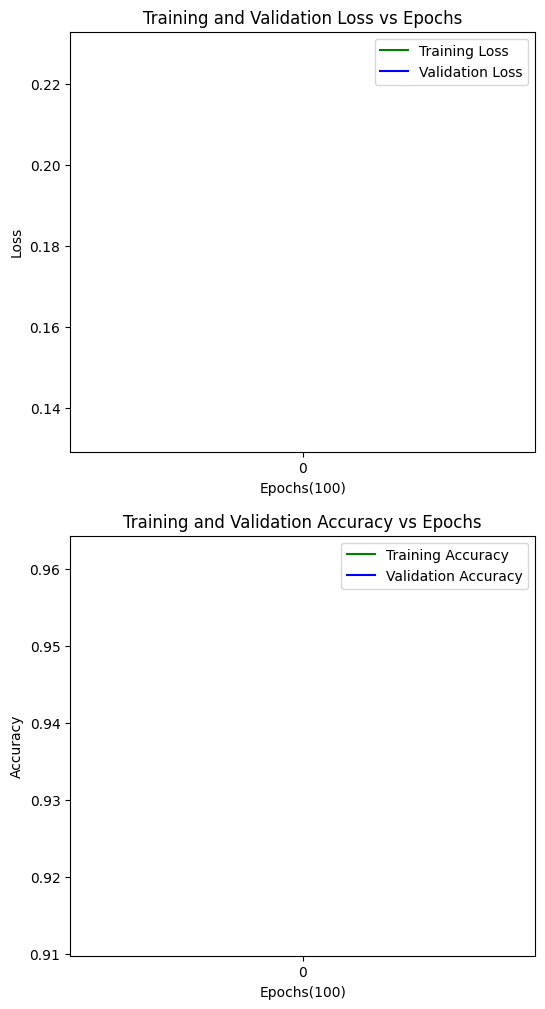

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.figure(figsize=(6,12))

plt.subplot(2,1,1)

plt.xlabel('Epochs(100)')
plt.ylabel('Loss')
plt.plot(loss, 'green', label='Training Loss')
plt.plot(val_loss, 'blue', label='Validation Loss')
plt.xticks(range(0,epochs)[0::100])
plt.title('Training and Validation Loss vs Epochs')
plt.legend()

plt.subplot(2,1,2)

plt.xlabel('Epochs(100)')
plt.ylabel('Accuracy')
plt.plot(acc, 'green', label='Training Accuracy')
plt.plot(val_acc, 'blue', label='Validation Accuracy')
plt.xticks(range(0,epochs)[0::100])
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.savefig("plots_perf.svg")
plt.show()

153/153 [==============================] - 5s 14ms/step


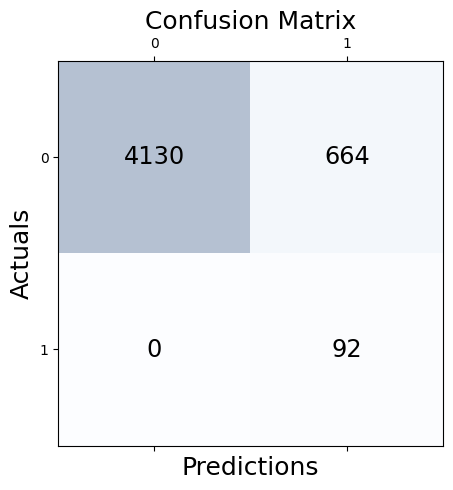

In [25]:
model_ecg.load_weights('./best_weights_ecg_32layer.hdf5')
y_pred = model_ecg.predict(ecg_test)
predict_test=np.argmax(y_pred, axis=1)
predict_test=predict_test.reshape(predict_test.shape[0],1)
cm=confusion_matrix(y_test_num, predict_test)
cm

# confusion_matrix = metrics.confusion_matrix(y_test_num, predict_test)
# cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
# cm_display.plot()
# plt.show()

# Calculate the confusion matrix
# conf_matrix = confusion_matrix(y_true=y_test_num, y_pred=predict_test)
conf_matrix = confusion_matrix(y_true=y_test_num, y_pred=predict_test)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [27]:
import math
from math import sqrt 
#(cm[1,0]+cm[0,0])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[0,1]) #accuracy

# Extract the true positive, true negative, false positive, and false negative values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
 
# Print the true positive, true negative, false positive, and false negative values
print("True Positive (TP): ", tp)
print("True Negative (TN): ", tn)
print("False Positive (FP): ", fp)
print("False Negative (FN): ", fn)
 
# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)
 
# Calculate precision
precision = tp / (tp + fp)
 
# Calculate sensitivity
sen = tp / (tp + fn)

#calculate specificity
spc = tn / (tn + fp)
 
# Calculate F1-score
f1_score = 2 * (precision * sen) / (precision + sen)

#calculate error rate 
err = (fp + fn) / (tp + tn + fp + fn)

# #calculate positive prediction value
# ppv = tp / (tp + fp)

#calculate negative prediction value 
npv = tn / (tn + fn)

#calculate false positive rate 
fpr = fp / (tp + fn)

#calculate false negative rate 
fnr = fn / (tp + fp)

#calculate false discovery rate
fdr = fp / (fp + tp)

#calculate matthew's correlation coefficient
mcc = ((tp * tn) - (fp * fn)) / sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))

#calculate true positive rate
tpr = tp / (tp + fn)
 
# Print the formulas for accuracy, precision, recall, and F1-score
# print("\n\nFormulas:")
# print("Accuracy: (TP + TN) / (TP + TN + FP + FN)")
# print("Precision: TP / (TP + FP)")
# print("Recall: TP / (TP + FN)")
# print("F1-score: 2 * (Precision * Recall) / (Precision + Recall)")
# print("Error rate: (FP + FN)/(TP + TN + FP + FN)")
 
# Print the accuracy, precision, recall, and F1-score
print("\n\nMetrics:")
print("Accuracy: ", round(accuracy, 2))
print("Precision: ", round(precision, 2))
print("sensitivity: ", round(sen, 2))
print("specificity: ", round(spc,2))
print("F1-score: ", round(f1_score, 2))
print("Error Rate: ", round(err,2))
#print("PPV: ", round(ppv,2))
print("NPV: ", round(npv,2))
print("FPR: ", round(fpr,2))
print("FNR: ", round(fnr,2))
print("FDR: ", round(fdr,2))
print("MCC: ", round(mcc,2))



True Positive (TP):  92
True Negative (TN):  4130
False Positive (FP):  664
False Negative (FN):  0


Metrics:
Accuracy:  0.86
Precision:  0.12
sensitivity:  1.0
specificity:  0.86
F1-score:  0.22
Error Rate:  0.14
NPV:  1.0
FPR:  7.22
FNR:  0.0
FDR:  0.88
MCC:  0.32


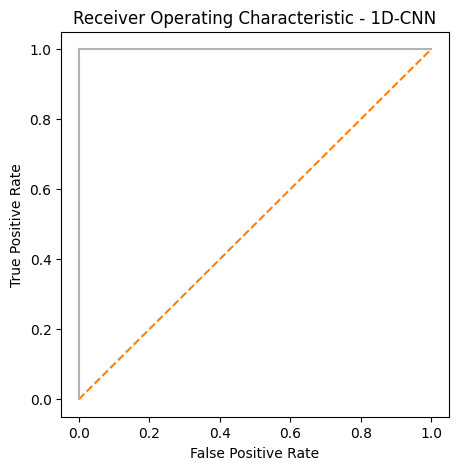

In [64]:
import scipy.io
import numpy as np
#from sklearn.svm import SVC

print(type(model_ecg))

def classify_output(output):
    if np.any(output) == 1:
        return "Yes"
    else:
        return "No"

mat = scipy.io.loadmat("D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\ucddb002_ecg_test.mat")
print(mat.keys())
x = mat['ecg_test']

prediction = model_ecg.predict(x)
print(prediction)
classification = classify_output(prediction)
print(classification)

<class 'keras.engine.sequential.Sequential'>
dict_keys(['__header__', '__version__', '__globals__', 'ecg_test'])
71/71 [==============================] - 1s 13ms/step
[[6.4779836e-01 3.5220161e-01]
 [9.6715271e-01 3.2847270e-02]
 [9.9999976e-01 2.5153716e-07]
 ...
 [1.0000000e+00 1.9177806e-08]
 [1.0000000e+00 4.6269516e-08]
 [9.9277520e-01 7.2247908e-03]]
No


In [ ]:
x = 0.02
y = 0.8696

#create ROC curve
# plt.plot(x,y)
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

plt.subplots(1, figsize=(5,5))
plt.title('Receiver Operating Characteristic - LSTM')
plt.plot(x, y)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [52]:
# model_ecg.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Load trained weights if available
# model_ecg.load_weights(best_weights_filepath_ecg)

# # Use predict() method to make predictions on new data
# predictions = model_ecg.predict("D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\ucddb002_ecg_test.mat")

import scipy.io

# Load .mat file
mat = scipy.io.loadmat('D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\ucddb002_ecg_test.mat')

# Get the input data from the .mat file
print(mat.keys())
x = mat['ecg_test']

def classify_output(output):
    if np.any(output) == 1:
        return "Yes"
    else:
        return "No"

# Make a prediction using the loaded model
prediction = model_ecg.predict(x)
classification = classify_output(prediction)
print(classification)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\mahika\\notes\\sem6\\minor\\dataset\\selected\\ucddb008_ecg_test.mat'

In [31]:
cm[1,0]/(cm[0,0]+cm[1,0]) #sensitivity 

0.9662077596996246

In [ ]:
cm[0,1]/(cm[0,1]+cm[1,1]) #specificity

In [ ]:
cm[0,0]/(cm[0,0]+cm[1,0]) #precision

0.9984910541064884

In [ ]:
cm[1,1]/(cm[1,0]+cm[1,1]) #false positive rate

In [30]:
cm[1,1]/(cm[1,1]+cm[1,0]) #negative prediction value 

0.9239130434782609

In [ ]:
(cm[0,1]+cm[1,1])/(cm[1,1]+cm[1,0]+cm[0,0]+cm[1,1]) #error rate